Algotimo genético 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import copy

# Hiperparâmetros
QntPopulacao = 50
QntGeracoes = 100
TaxaMutacao = 0.1
TaxaElitismo = 0.2

QntTorneio = 2

np.random.seed(42)

# Dados do problema da mochila

rangePesos = [50, 100]
rangeValores = [50, 200]
num_itens = 25

# Gera os pesos e valores usando a semente definida
pesos = np.random.randint(rangePesos[0], rangePesos[1] + 1, size=num_itens)
valores = np.random.randint(rangeValores[0], rangeValores[1] + 1, size=num_itens)

capacidade_mochila = 1000

In [14]:
def inicializar_populacao(tamanho_populacao, num_itens):
    return np.random.randint(2, size=(tamanho_populacao, num_itens))

def selecao_torneio(populacao, fitnesses, qntd_Torneios, qntd_porTorneio):
    selecionados = []
    for _ in range(qntd_Torneios):
        melhor_fitness = -float('inf') 
        indice_melhor_fitness = -float('inf')
        indices_populacao = np.arange(len(populacao))
        candidatos_indices = np.random.choice(indices_populacao, size=qntd_porTorneio, replace=False)
        for indice in range(len(candidatos_indices)):
            fitness_atual = fitnesses[candidatos_indices[indice]]
            # print(fitness_atual)
            if fitness_atual > melhor_fitness:
                melhor_fitness = fitness_atual
                indice_melhor_fitness = indice
        # print(melhor_fitness)

        selecionados.append(populacao[candidatos_indices[indice_melhor_fitness]])

    return selecionados

def cruzamento(pai1, pai2):
    ponto_cruzamento = np.random.randint(1, len(pai1) - 1)
    filho1 = np.concatenate((pai1[:ponto_cruzamento], pai2[ponto_cruzamento:]))
    filho2 = np.concatenate((pai2[:ponto_cruzamento], pai1[ponto_cruzamento:]))
    return filho1, filho2

def mutacao(solucao, taxa_mutacao):
    for i in range(len(solucao)):
        if np.random.rand() < taxa_mutacao:
            solucao[i] = 1 - solucao[i]
    return solucao

def fitness(solucao, pesos, valores, capacidade_mochila):
    valor_total = sum(valores[i] for i in range(len(solucao)) if solucao[i] == 1)
    peso_total = sum(pesos[i] for i in range(len(solucao)) if solucao[i] == 1)
    if peso_total > capacidade_mochila:
        return 0  # Retorna 0 se a solução exceder a capacidade da mochila
    else:
        return valor_total  # Retorna o valor total da mochila


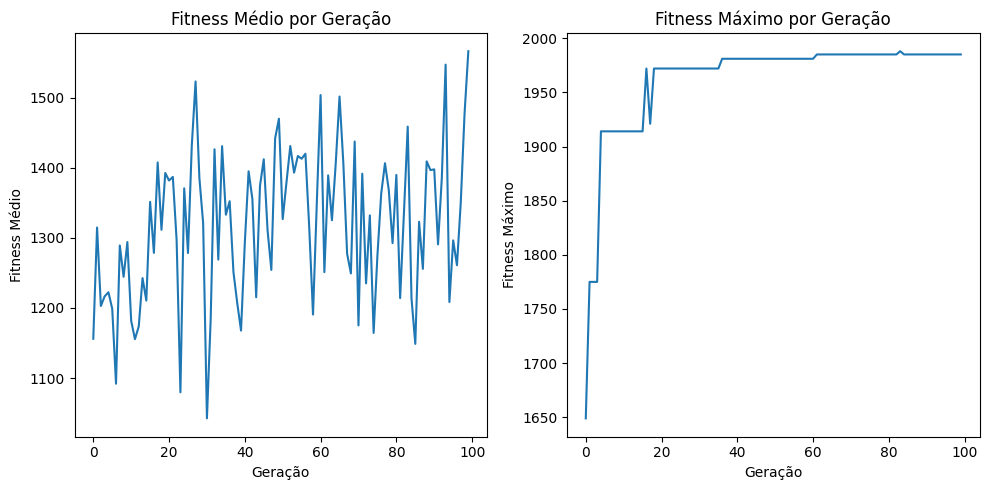

In [15]:
def algoritmo_genetico(pesos, valores, capacidade_mochila, tamanho_populacao, num_geracoes, taxa_mutacao):
    populacao = inicializar_populacao(tamanho_populacao, len(pesos))
    
    fitnesses = np.array([fitness(solucao, pesos, valores, capacidade_mochila) for solucao in populacao])

   
    fitnesses_medios = []
    melhores_fitnesses = []  

    for _ in range(num_geracoes):
        elite = []
        elite = selecao_torneio(populacao, fitnesses, int(len(populacao) * TaxaElitismo), 10)
        fitnesses = np.array([fitness(solucao, pesos, valores, capacidade_mochila) for solucao in populacao])
        novos_individuos = []
        for _ in range((len(populacao) - len(elite)) // 2):
            pais = selecao_torneio(populacao, fitnesses, 2, QntTorneio)
            filhos = cruzamento(pais[0], pais[1])
            filhos = [mutacao(filho, taxa_mutacao) for filho in filhos]
            novos_individuos.extend(filhos)
        elite.extend(np.array(novos_individuos))
        populacao = copy.deepcopy(np.array(elite))
        fitnesses = np.array([fitness(solucao, pesos, valores, capacidade_mochila) for solucao in populacao])
        fitnesses_medios.append(np.mean(fitnesses))
        melhores_fitnesses.append(np.max(fitnesses))  

    # Plotagem do fitness médio
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(fitnesses_medios)
    plt.xlabel('Geração')
    plt.ylabel('Fitness Médio')
    plt.title('Fitness Médio por Geração')

    # Plotagem do fitness máximo
    plt.subplot(1, 2, 2)
    plt.plot(melhores_fitnesses)
    plt.xlabel('Geração')
    plt.ylabel('Fitness Máximo')
    plt.title('Fitness Máximo por Geração')

    plt.tight_layout()
    plt.show()

# Executando o algoritmo genético
algoritmo_genetico(pesos, valores, capacidade_mochila, QntPopulacao, QntGeracoes, TaxaMutacao)